In [1]:
# Book Recommendation Systems

In [2]:
# https://www.kaggle.com/code/midouazerty/book-recommendation-system-with-machine-learning/notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11272\340032577.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX_Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")


In [4]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [5]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [6]:
books.shape

(271379, 8)

In [7]:
books.info

<bound method DataFrame.info of               ISBN                                          bookTitle  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271374  0440400988                         There's a Bat in Bunk Five   
271375  0525447644                            From One to One Hundred   
271376  006008667X  Lily Dale : The True Story of the Town that Ta...   
271377  0192126040                        Republic (World's Classics)   
271378  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                  bookAuthor  yearOfPublication  \
0         Mark P. O. Morford            

In [8]:
books.describe()

,yearOfPublication
count,271379.000000
mean,1959.756050
std,258.011363
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11272\2773635056.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")


In [11]:
users.shape

(278858, 3)

In [13]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [14]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11272\3854613350.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")


In [17]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [18]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

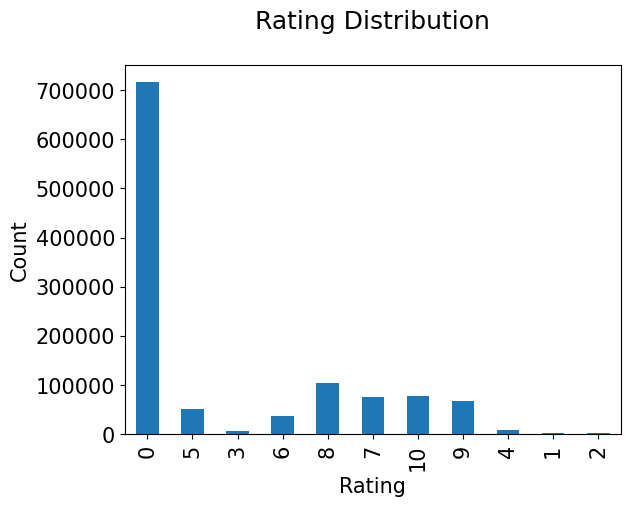

In [19]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

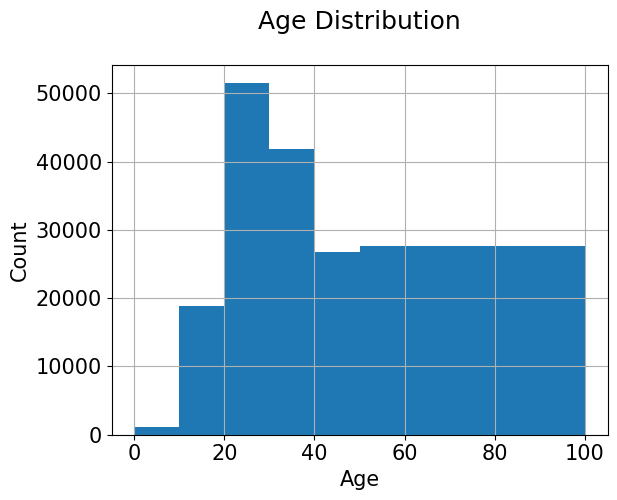

In [20]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [21]:
#To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [22]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [23]:
#Collaborative Filtering Using k-Nearest Neighbors (kNN)
#kNN is a machine learning algorithm to find clusters of similar users based on common book ratings,
# and make predictions using the average rating of top-k nearest neighbors.

#For example, we first present ratings in a matrix with the matrix having one row for each item (book) and 
# one column for each user.

In [24]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  
0  Politically Correct Bedtime Stories: Modern Ta...  
1  Politically Correct Bedtime Stories: Modern Ta...  
2  Politically Correct Bedtime Stories: Modern Ta...  
3  Politically Correct Bedtime Stories: Modern Ta...  
4  Politically Correct Bedtime Stories: Modern Ta...  


In [25]:
combine_book_rating.dtypes

userID         int64
ISBN          object
bookRating     int64
bookTitle     object
dtype: object

In [26]:
# Now we will group by book titles and create a new column for total rating count.

In [27]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
print(book_ratingCount.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


In [28]:
# Now we will combine the rating data with the total rating count data, 
# this gives us exactly what we need to find out which books are popular and filter out lesser-known books.¶

In [29]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1  Politically Correct Bedtime Stories: Modern Ta...                82  
2  Politically Correct Bedtime Stories: Modern Ta...                82  
3  Politically Correct Bedtime Stories: Modern Ta...                82  
4  Politically Correct Bedtime Stories: Modern Ta...                82  
count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [30]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [31]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [32]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1  Politically Correct Bedtime Stories: Modern Ta...                82  
2  Politically Correct Bedtime Stories: Modern Ta...                82  
3  Politically Correct Bedtime Stories: Modern Ta...                82  
4  Politically Correct Bedtime Stories: Modern Ta...                82  


In [33]:
# Filter to users in US and Canada only

In [34]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
3   12538  002542730X          10   
4   13552  002542730X           0   
5   16795  002542730X           0   

                                           bookTitle  totalRatingCount  \
0  Politically Correct Bedtime Stories: Modern Ta...                82   
1  Politically Correct Bedtime Stories: Modern Ta...                82   
3  Politically Correct Bedtime Stories: Modern Ta...                82   
4  Politically Correct Bedtime Stories: Modern Ta...                82   
5  Politically Correct Bedtime Stories: Modern Ta...                82   

                        Location  
0          gilbert, arizona, usa  
1      knoxville, tennessee, usa  
3          byron, minnesota, usa  
4        cordova, tennessee, usa  
5  mechanicsville, maryland, usa  


In [35]:
# Implementing kNN
# We convert our table to a 2D matrix, and fill the missing values with zeros
#(since we will calculate distances between rating vectors).

#We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

In [36]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


In [37]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot.index[query_index]

193
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0. 10.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.
   0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0. 

'Fall On Your Knees (Oprah #45)'

In [38]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Fall On Your Knees (Oprah #45):

1: A Lesson Before Dying (Vintage Contemporaries (Paperback)), with distance of 0.6430516681122765:
2: We Were the Mulvaneys, with distance of 0.6736872737523558:
3: House of Sand and Fog, with distance of 0.7014869640677219:
4: The Virgin Suicides, with distance of 0.7305650885306991:
5: Blue Diary, with distance of 0.7442378582628152:


In [ ]:
# https://www.kaggle.com/code/midouazerty/book-recommendation-system-with-machine-learning/notebook